<a href="https://colab.research.google.com/github/dhruvnasit0603/DS220-Final-Project-2/blob/main/DS220_Final_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

Introduction about the dataset: this dataset is of people having insurance and it cointains various columns storing different types of data of a particular individual. I will use the word 'benificiary' to refer to each individual in this dataset.

Age :- This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).

Sex :- This is the policy holder's gender, either male or female.

BMI :- This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.

Children :- This is an integer indicating the number of children / dependents covered by the insurance plan.

Smoker :- This is yes or no depending on whether the insured regularly smokes tobacco.

Region :- This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.

Charges​ :- Individual medical costs billed to health insurance

Total Rows - 1338

Leveraging customer information is of paramount importance for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions.

Question to be answered:
1. How do medical costs vary by age group?
2. Is there a difference in medical costs between males and females?
3. How does BMI influence medical costs?
4. Is there a relationship between the number of children and medical costs?
5. Do smokers incur higher medical costs than non-smokers?
6. How do medical costs differ across regions?
7. Among smokers, does BMI significantly affect medical costs?
8. Is there a correlation between the number of children and the BMI of the policyholder?
9. What is the age distribution among smokers and non-smokers?
10. What are the most influential factors driving medical costs?

In [78]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<ipython-input-79-2a06824ac567>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_costs = data.groupby('age_group')['charges'].mean()


Average medical costs by age group:
age_group
18-30     9822.837599
31-40    11639.308653
41-50    14782.043077
51-60    17062.292763
61-70    21063.163398
Name: charges, dtype: float64


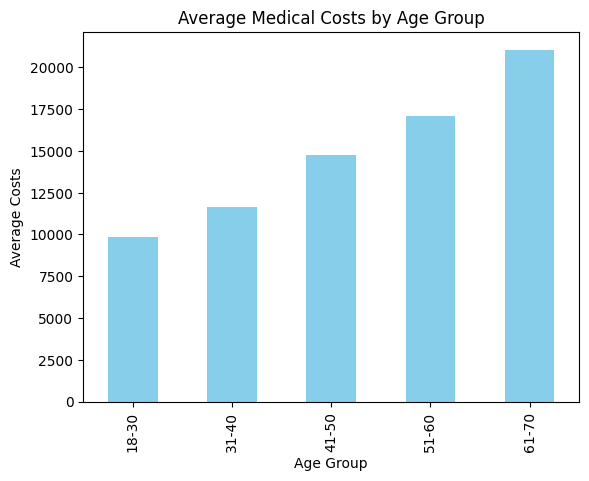

In [79]:
# Question 1: How do medical costs vary by age group?
data['age_group'] = pd.cut(data['age'], bins=[18, 30, 40, 50, 60, 70], labels=['18-30', '31-40', '41-50', '51-60', '61-70'])
age_group_costs = data.groupby('age_group')['charges'].mean()
print("Average medical costs by age group:")
print(age_group_costs)
age_group_costs.plot(kind='bar', title='Average Medical Costs by Age Group', xlabel='Age Group', ylabel='Average Costs', color='skyblue')
plt.show()

# **Q1 Analysis**

The analysis shows that medical costs increase with age. Here are the key observations:

Individuals in the 18–30 age group incur the lowest average medical costs (9,822.84 Dollars).

Medical costs rise steadily for older age groups, with the 31–40 and 41–50 age groups averaging 11,639.31 dollars and 14,782.04 dollars, respectively.

The highest average medical costs are observed for individuals in the 61–70 age group (21,063.16 Dollars).

This trend suggests that older individuals tend to have higher medical expenses, likely due to increased healthcare needs as they age. This finding aligns with general expectations about aging and its impact on health-related costs.

Average medical costs by gender:
sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64


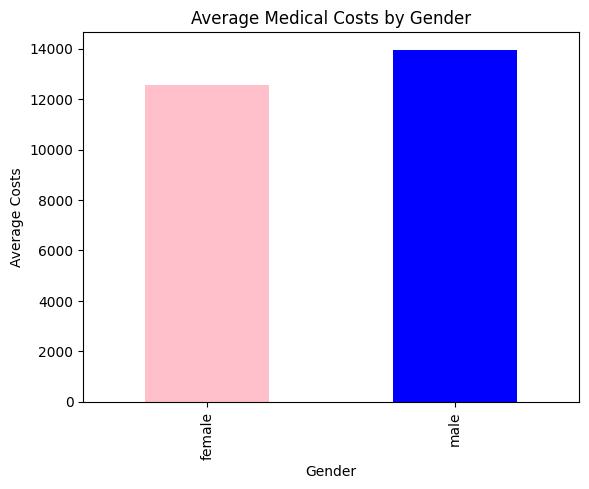

In [80]:
# Question 2: Is there a difference in medical costs between males and females?
gender_costs = data.groupby('sex')['charges'].mean()
print("Average medical costs by gender:")
print(gender_costs)
gender_costs.plot(kind='bar', title='Average Medical Costs by Gender', xlabel='Gender', ylabel='Average Costs', color=['pink', 'blue'])
plt.show()

#**Q2 Analysis**

The analysis reveals a slight difference in average medical costs between males and females. Males have higher average medical costs (13,956.75 Dollars) compared to females (12,569.58 Dollars). While the difference is notable, it is not large enough to suggest that gender alone is a strong determinant of medical expenses.

This finding indicates that other factors, such as age, BMI, smoking status, or pre-existing health conditions, may play a more significant role in driving medical costs. Additional statistical testing, such as a t-test, could help determine whether this observed difference is statistically significant or simply due to random variation in the dataset.

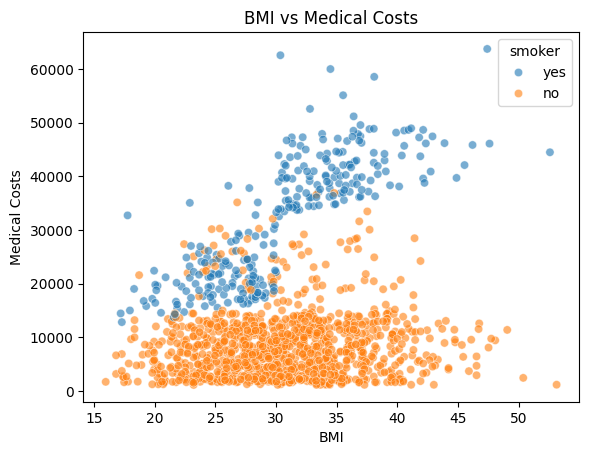

In [81]:
# Question 3: How does BMI influence medical costs?
sns.scatterplot(data=data, x='bmi', y='charges', hue='smoker', alpha=0.6)
plt.title('BMI vs Medical Costs')
plt.xlabel('BMI')
plt.ylabel('Medical Costs')
plt.show()

#**Q3 Analysis**

The scatterplot reveals that BMI significantly influences medical costs, with the relationship varying markedly between smokers and non-smokers:

Smokers: There is a strong trend where higher BMI is associated with substantially higher medical costs. This suggests that BMI amplifies health risks for smokers, leading to more medical expenses due to conditions like heart disease, diabetes, or other obesity-related issues.

Non-Smokers: For non-smokers, BMI does not show a strong effect on medical costs. The costs remain relatively consistent regardless of BMI, indicating that non-smokers may not face the same compounded health risks as smokers.

This analysis highlights the importance of considering smoking status alongside BMI when evaluating medical costs. It suggests that smokers with high BMI contribute significantly to healthcare expenses, underscoring the compounded health risks associated with these factors.

Average medical costs by number of children:
children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64


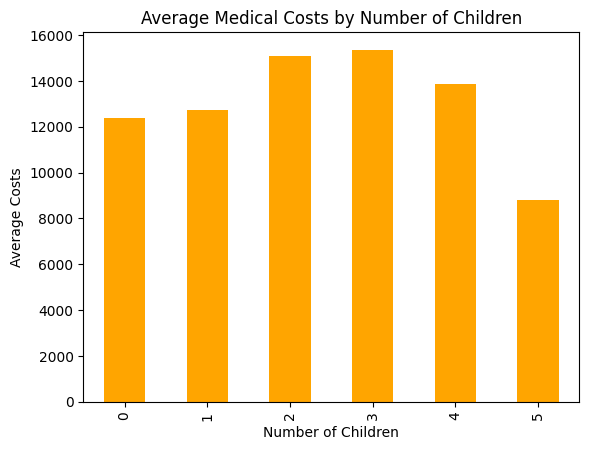

In [82]:
# Question 4: Is there a relationship between the number of children and medical costs?
children_costs = data.groupby('children')['charges'].mean()
print("Average medical costs by number of children:")
print(children_costs)
children_costs.plot(kind='bar', title='Average Medical Costs by Number of Children', xlabel='Number of Children', ylabel='Average Costs', color='orange')
plt.show()

#**Q4 Analysis**

The relationship between the number of children and average medical costs is not entirely linear:

Medical costs are lowest for individuals with no children (12,365.98 Dollars).
Costs increase steadily for individuals with 1 to 3 children, peaking at 15,535.32 Dollars for those with 3 children.

For families with 4 children, costs decrease slightly (13,850.66 Dollars), and for 5 children, the average medical costs drop significantly to 8,786.04 Dollars.

This trend suggests that while having more children generally correlates with higher medical costs (likely due to additional healthcare needs), the sharp decline for families with 5 children could indicate anomalies or smaller sample sizes for this group. Further analysis could explore whether this is due to data irregularities, subsidies, or other external factors influencing medical costs.

Average medical costs by smoking status:
smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64


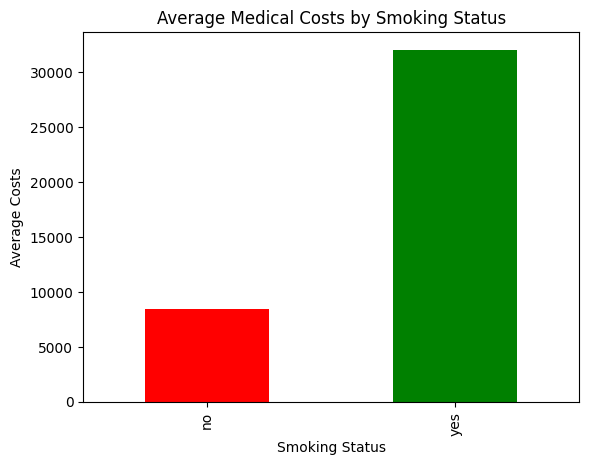

In [83]:
# Question 5: Do smokers incur higher medical costs than non-smokers?
smoker_costs = data.groupby('smoker')['charges'].mean()
print("Average medical costs by smoking status:")
print(smoker_costs)
smoker_costs.plot(kind='bar', title='Average Medical Costs by Smoking Status', xlabel='Smoking Status', ylabel='Average Costs', color=['red', 'green'])
plt.show()

#**Q5 Analysis**

The analysis reveals a significant difference in medical costs between smokers and non-smokers:

Smokers: The average medical cost for smokers is 32,050.23 Dollars, which is nearly four times higher than that of non-smokers.

Non-Smokers: The average medical cost for non-smokers is 8,434.27 Dollars.

This stark contrast highlights the substantial impact of smoking on medical costs, likely due to the higher prevalence of smoking-related health issues such as lung disease, heart problems, and cancer. These findings emphasize the importance of smoking cessation efforts, both for individual health and to reduce overall healthcare costs.

Average medical costs by region:
region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


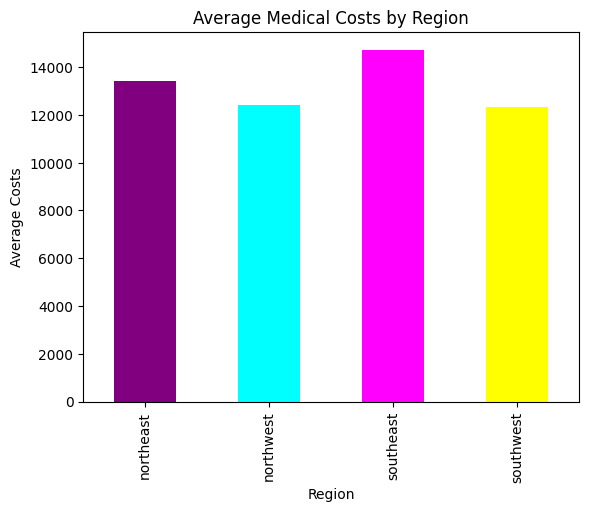

In [84]:
# Question 6: How do medical costs differ across regions?
region_costs = data.groupby('region')['charges'].mean()
print("Average medical costs by region:")
print(region_costs)
region_costs.plot(kind='bar', title='Average Medical Costs by Region', xlabel='Region', ylabel='Average Costs', color=['purple', 'cyan', 'magenta', 'yellow'])
plt.show()

#**Q6 Analysis**

The analysis shows variation in average medical costs across different regions:

Southeast: This region has the highest average medical costs at 14,735.41 Dollars.

Northeast: The second-highest costs are observed here, averaging 13,406.38 Dollars.

Northwest: This region shows slightly lower costs at 12,417.58 Dollars.

Southwest: The lowest average costs are found in the Southwest at 12,346.94 Dollars.

This variation suggests that regional factors, such as differences in healthcare accessibility, cost structures, lifestyle, or demographics, could influence medical costs. The notably higher costs in the Southeast may warrant further investigation to understand potential contributing factors, such as higher prevalence of smoking, obesity, or chronic illnesses in this region.

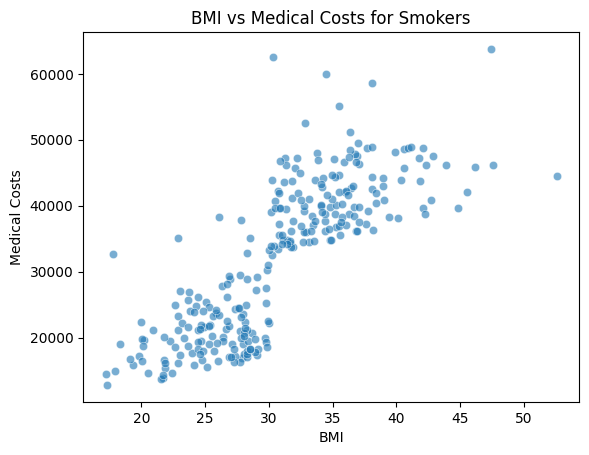

In [85]:
# Question 7: Among smokers, does BMI significantly affect medical costs?
smoker_data = data[data['smoker'] == 'yes']
sns.scatterplot(data=smoker_data, x='bmi', y='charges', alpha=0.6)
plt.title('BMI vs Medical Costs for Smokers')
plt.xlabel('BMI')
plt.ylabel('Medical Costs')
plt.show()

#**Q7 Analysis**

The scatterplot illustrates that BMI significantly impacts medical costs among smokers:

Positive Relationship: As BMI increases, medical costs also tend to rise, showing a clear upward trend. This indicates that higher BMI is associated with increased healthcare expenses for smokers.

Wide Range of Costs: Smokers with higher BMI values generally incur substantially higher medical costs, likely due to the compounded health risks associated with obesity and smoking, such as cardiovascular diseases or respiratory issues.

This finding highlights that BMI is a critical factor driving medical costs for smokers. It underscores the compounded health risks and higher associated healthcare expenses when both smoking and high BMI are present. These insights can guide public health initiatives to address obesity and smoking jointly to reduce overall medical costs.

In [86]:
# Question 8: Is there a correlation between the number of children and the BMI of the policyholder?
correlation_children_bmi = data['children'].corr(data['bmi'])
print(f"Correlation between number of children and BMI: {correlation_children_bmi}")

Correlation between number of children and BMI: 0.012758900820673817


#**Q8 Analysis**

The calculated correlation coefficient between the number of children and BMI is approximately 0.013, indicating an extremely weak positive correlation.

This result suggests:

There is no meaningful relationship between the number of children a policyholder has and their BMI.

The two variables are largely independent, meaning changes in the number of children do not significantly influence BMI.

This insight helps streamline the focus of future analyses by directing attention to more impactful variables that may better explain trends in BMI or associated health outcomes.

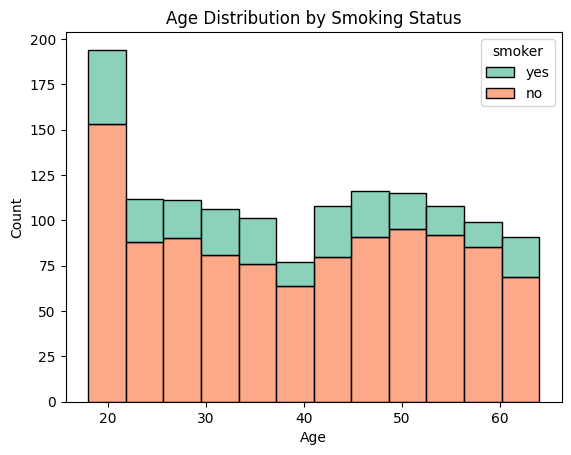

In [91]:
# Question 9: What is the age distribution among smokers and non-smokers?
sns.histplot(data=data, x='age', hue='smoker', multiple='stack', palette='Set2')
plt.title('Age Distribution by Smoking Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#**Q9 Analysis**

The age distribution among smokers and non-smokers reveals the following trends:

Non-Smokers: Non-smokers are more prevalent across all age groups, consistently outnumbering smokers in every category.

Smokers: Smoking is more common among younger populations (ages 20–30) but decreases slightly as age increases. However, there remain a notable number of smokers across older age ranges.

This distribution suggests that smoking behavior is concentrated in younger age groups but persists into middle and older ages. These insights could inform public health campaigns aiming to target younger demographics for smoking prevention and cessation efforts while continuing to address persistent smoking habits in older groups. Additionally, this data may provide valuable context for analyzing medical cost disparities between smokers and non-smokers in different age brackets.

Mean Squared Error of the Random Forest Model: 21145485.40534823
Feature Importances:
             Feature  Importance
4         smoker_yes    0.608618
1                bmi    0.216546
0                age    0.132073
2           children    0.019259
3           sex_male    0.005958
6   region_southeast    0.005336
5   region_northwest    0.005320
7   region_southwest    0.004092
8    age_group_31-40    0.000840
10   age_group_51-60    0.000827
9    age_group_41-50    0.000682
11   age_group_61-70    0.000448


<ipython-input-88-eae822fc90e2>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')


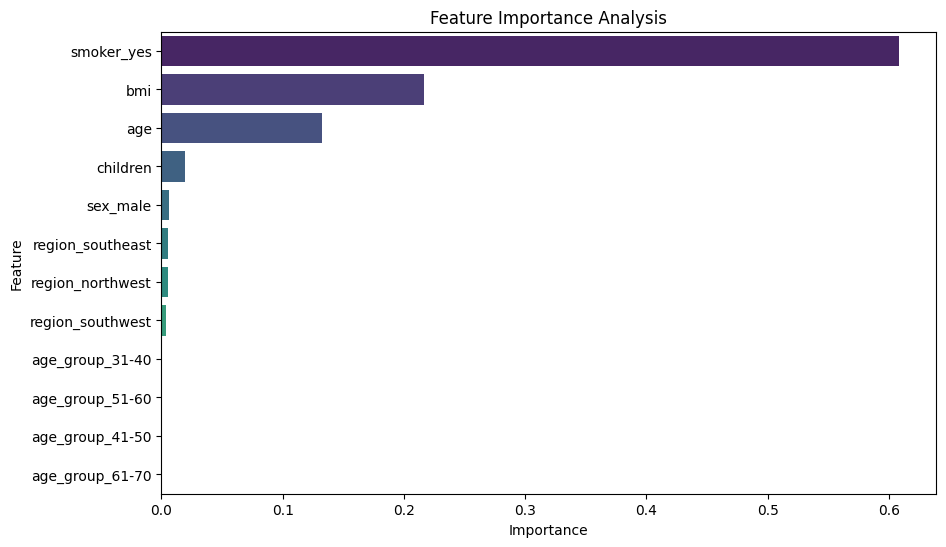

In [88]:
# Question 10: What are the most influential features driving medical costs?
# Encoding categorical variables
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region', 'age_group'], drop_first=True)

# Splitting data into features and target
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate performance
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of the Random Forest Model: {mse}")

# Extract and display feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance Analysis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#**Q10 Analysis**

The results highlight that smoking status, BMI, and age are the primary drivers of medical costs. Public health initiatives targeting smoking cessation and obesity reduction could significantly reduce overall medical expenditures. Additionally, these insights can guide healthcare providers and policymakers in designing strategies to address high-cost groups effectively.